### Analysis of human ribosome profiling dataset (Park et al. 2016; PMID: 27153541) using ribotricer

#### Predict ORFs from transcriptome

In [1]:
from riboss.orfs import orf_finder
import pyranges as pr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

annotation='../ref/hg38/gencode.v47.annotation.bed'
fasta='../ref/hg38/hg38.fa'

cds_range, df = orf_finder(annotation, fasta, ncrna=False, outdir=None, start_codon=['ATG'])

finding all ORFs       : 100%|████████████████████████████████████| 112k/112k [02:22<00:00, 789it/s]
converting coordinates : 100%|█████████████████████████████████| 2.46M/2.46M [00:11<00:00, 206kit/s]
converting coordinates : 100%|████████████████████████████████| 2.39M/2.39M [03:16<00:00, 12.2kit/s]
INFO:root:found 1484629 ORFs in 11 min 54 s
INFO:root:saved sequences as ../ref/hg38/gencode.v47.annotation.transcripts.fa
INFO:root:saved sequences as ../ref/hg38/gencode.v47.annotation.gp
INFO:root:saved sequences as ../ref/hg38/gencode.v47.annotation.orf_finder.pkl.gz
INFO:root:saved CDS range as ../ref/hg38/gencode.v47.annotation.cds_range.txt


In [2]:
df.value_counts('ORF_type')

ORF_type
dORF    1080162
mORF      85671
uORF      84060
oORF      67910
Name: count, dtype: int64

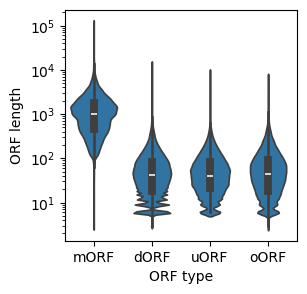

In [3]:
import os

fpath = '../results/park_2016_datasets/orf_finder/' 
if not os.path.exists(fpath):
    os.makedirs(fpath)
    
plt.figure(figsize=(3,3))
sns.violinplot(data=df, x='ORF_type', y='ORF_length', log_scale=True)
plt.xlabel('ORF type')
plt.ylabel('ORF length')
plt.savefig(fpath + 'orf_finder.pdf', bbox_inches='tight')

#### Build a STAR index for the human transcriptome

In [1]:
import os
from riboss.wrapper import build_star_index

tx = '../ref/hg38/gencode.v47.pc_transcripts.fa'
index = os.path.split(tx)[0] + '/' + '.'.join(os.path.split(tx)[1].split(os.extsep)[:-1])

build_star_index(tx, index, delim='|')

INFO:root:renamed ../ref/gencode.v47.pc_transcripts.fa as ../ref/gencode.v47.pc_transcripts.original.fasta
INFO:root:cleaned up fasta headers and saved as ../ref/gencode.v47.pc_transcripts.fa


	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode genomeGenerate --runThreadN 4 --genomeDir ../ref/gencode.v47.pc_transcripts --genomeFastaFiles ../ref/gencode.v47.pc_transcripts.fa --genomeSAindexNbases 7 --genomeChrBinNbits 11
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 01 10:18:38 ..... started STAR run
Feb 01 10:18:38 ... starting to generate Genome files
Feb 01 10:18:41 ... starting to sort Suffix Array. This may take a long time...
Feb 01 10:18:43 ... sorting Suffix Array chunks and saving them to disk...
Feb 01 10:20:55 ... loading chunks from disk, packing SA...
Feb 01 10:21:06 ... finished generating suffix array
Feb 01 10:21:06 ... generating Suffix Array index
Feb 01 10:21:06 ... completed Suffix Array index
Feb 01 10:21:06 ... writing Genome to disk ...
Feb 01 10:21:08 ... writing Suffix Array to disk ...


INFO:root:saved index to ../ref/gencode.v47.pc_transcripts


Feb 01 10:21:17 ... writing SAindex to disk
Feb 01 10:21:17 ..... finished successfully


In [3]:
from glob import glob
from riboss.wrapper import align_short_reads

num_threads = 32
clip_3p_adapter_seq = 'TGGAATTCTCGGGTGCC'
sam_type = 'BAM Unsorted'

for i in glob('../doc/park_2016_datasets/*/*.fastq.gz'):
    prefix = os.path.split(i)[0] + '/' + '.'.join(os.path.split(i)[1].split(os.extsep)[:-2])
    align_short_reads(i, prefix, index, num_threads=num_threads, clip_3p_adapter_seq=clip_3p_adapter_seq, sam_type=sam_type)

	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --readFilesIn ../doc/park_2016_datasets/SRR3306588/SRR3306588.fastq.gz --outFileNamePrefix ../doc/park_2016_datasets/SRR3306588/SRR3306588 --genomeDir ../ref/gencode.v47.pc_transcripts --runThreadN 32 --readFilesCommand zcat --seedSearchLmax 10 --outFilterMultimapScoreRange 0 --outFilterMultimapNmax 255 --outFilterMismatchNmax 1 --outFilterIntronMotifs RemoveNoncanonical --outSAMtype BAM Unsorted --clip3pAdapterSeq TGGAATTCTCGGGTGCC
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 01 10:23:43 ..... started STAR run
Feb 01 10:23:43 ..... loading genome
Feb 01 10:23:44 ..... started mapping
Feb 01 10:32:56 ..... finished mapping
Feb 01 10:32:56 ..... finished successfully


INFO:root:saved alignment to ../doc/park_2016_datasets/SRR3306588/SRR3306588Aligned.out.bam


	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --readFilesIn ../doc/park_2016_datasets/SRR3306589/SRR3306589.fastq.gz --outFileNamePrefix ../doc/park_2016_datasets/SRR3306589/SRR3306589 --genomeDir ../ref/gencode.v47.pc_transcripts --runThreadN 32 --readFilesCommand zcat --seedSearchLmax 10 --outFilterMultimapScoreRange 0 --outFilterMultimapNmax 255 --outFilterMismatchNmax 1 --outFilterIntronMotifs RemoveNoncanonical --outSAMtype BAM Unsorted --clip3pAdapterSeq TGGAATTCTCGGGTGCC
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 01 10:32:56 ..... started STAR run
Feb 01 10:33:08 ..... loading genome
Feb 01 10:33:08 ..... started mapping


INFO:root:saved alignment to ../doc/park_2016_datasets/SRR3306589/SRR3306589Aligned.out.bam


Feb 01 10:44:04 ..... finished mapping
Feb 01 10:44:04 ..... finished successfully
	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --readFilesIn ../doc/park_2016_datasets/SRR3306581/SRR3306581.fastq.gz --outFileNamePrefix ../doc/park_2016_datasets/SRR3306581/SRR3306581 --genomeDir ../ref/gencode.v47.pc_transcripts --runThreadN 32 --readFilesCommand zcat --seedSearchLmax 10 --outFilterMultimapScoreRange 0 --outFilterMultimapNmax 255 --outFilterMismatchNmax 1 --outFilterIntronMotifs RemoveNoncanonical --outSAMtype BAM Unsorted --clip3pAdapterSeq TGGAATTCTCGGGTGCC
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 01 10:44:04 ..... started STAR run
Feb 01 10:44:04 ..... loading genome
Feb 01 10:44:05 ..... started mapping
Feb 01 10:47:38 ..... finished mapping
Feb 01 10:47:38 ..... finished successfully


INFO:root:saved alignment to ../doc/park_2016_datasets/SRR3306581/SRR3306581Aligned.out.bam


	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --readFilesIn ../doc/park_2016_datasets/SRR3306582/SRR3306582.fastq.gz --outFileNamePrefix ../doc/park_2016_datasets/SRR3306582/SRR3306582 --genomeDir ../ref/gencode.v47.pc_transcripts --runThreadN 32 --readFilesCommand zcat --seedSearchLmax 10 --outFilterMultimapScoreRange 0 --outFilterMultimapNmax 255 --outFilterMismatchNmax 1 --outFilterIntronMotifs RemoveNoncanonical --outSAMtype BAM Unsorted --clip3pAdapterSeq TGGAATTCTCGGGTGCC
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 01 10:47:38 ..... started STAR run
Feb 01 10:47:48 ..... loading genome
Feb 01 10:47:49 ..... started mapping


INFO:root:saved alignment to ../doc/park_2016_datasets/SRR3306582/SRR3306582Aligned.out.bam


Feb 01 10:52:53 ..... finished mapping
Feb 01 10:52:53 ..... finished successfully


#### Analyse ribosome footprints

downsampling BAM       : 366528041it [04:40, 1307999.32it/s]
comparing periodicity  : 100%|████████████████████████████████████████| 9/9 [00:00<00:00, 21.44it/s]
INFO:root:saved selected footprint sizes with an offset as ../results/park_2016_datasets/analyse_footprints/SRR3306588Aligned.out.offset.txt
INFO:root:converted mapped frames into heatmaps as ../results/park_2016_datasets/analyse_footprints/SRR3306588Aligned.out.frames.pdf
INFO:root:saved metagene plots as ../results/park_2016_datasets/analyse_footprints/SRR3306588Aligned.out.start_codon.pdf and ../results/park_2016_datasets/analyse_footprints/SRR3306588Aligned.out.stop_codon.pdf
downsampling BAM       : 482962761it [06:27, 1247102.20it/s]
comparing periodicity  : 100%|██████████████████████████████████████| 10/10 [00:00<00:00, 24.12it/s]
INFO:root:saved selected footprint sizes with an offset as ../results/park_2016_datasets/analyse_footprints/SRR3306589Aligned.out.offset.txt
INFO:root:converted mapped frames into heatmaps as

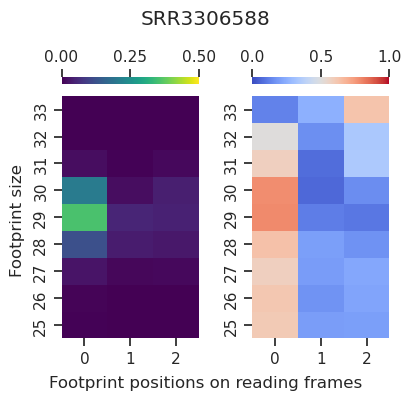

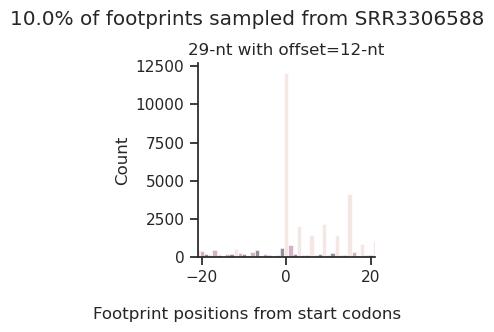

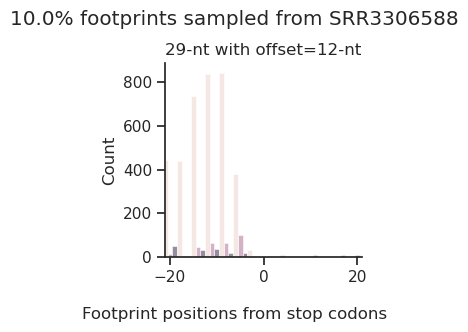

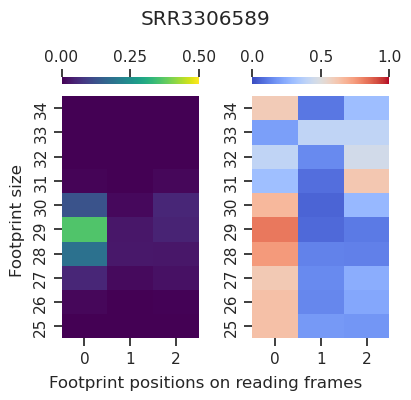

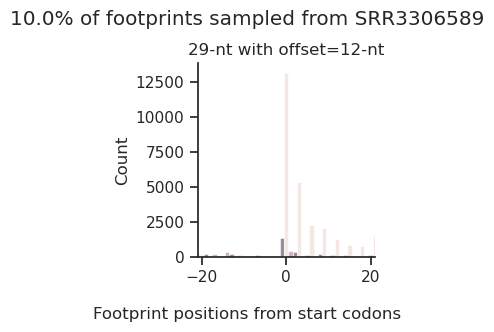

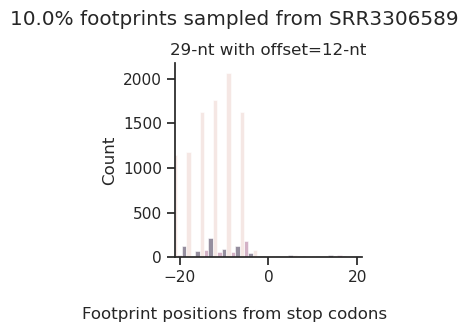

In [1]:
import numpy as np
import pandas as pd

import os
from glob import glob
from riboss.footprints import analyse_footprints


offset_method = '5p'
adj = 12
downsampling = 0.1
outdir = '../results/park_2016_datasets/analyse_footprints'
cds_range = '../ref/hg38/gencode.v47.annotation.cds_range.txt'

footprint_stats = []
for i in glob('../doc/park_2016_datasets/*/*Aligned.out.bam')[:2]:
    stats = analyse_footprints(offset_method, adj, i, downsampling, cds_range, 'best', outdir)
    stats['run'] = os.path.basename(i)
    stats['run'] = stats['run'].str.replace('Aligned.out.bam','')
    footprint_stats.append(stats)

downsampling BAM       : 260126939it [03:28, 1249500.09it/s]
comparing periodicity  : 100%|████████████████████████████████████████| 1/1 [00:00<00:00, 23.48it/s]
INFO:root:saved selected footprint sizes with an offset as ../results/park_2016_datasets/analyse_footprints/SRR3306581Aligned.out.offset.txt
INFO:root:converted mapped frames into heatmaps as ../results/park_2016_datasets/analyse_footprints/SRR3306581Aligned.out.frames.pdf
INFO:root:saved metagene plots as ../results/park_2016_datasets/analyse_footprints/SRR3306581Aligned.out.start_codon.pdf and ../results/park_2016_datasets/analyse_footprints/SRR3306581Aligned.out.stop_codon.pdf
downsampling BAM       : 389697498it [05:01, 1294076.75it/s]


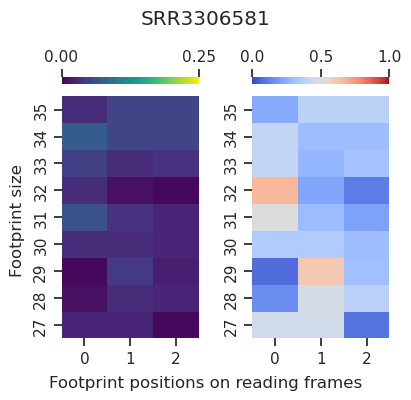

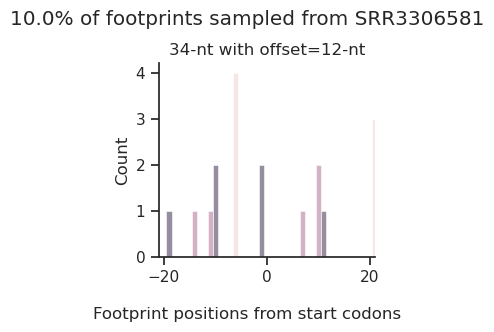

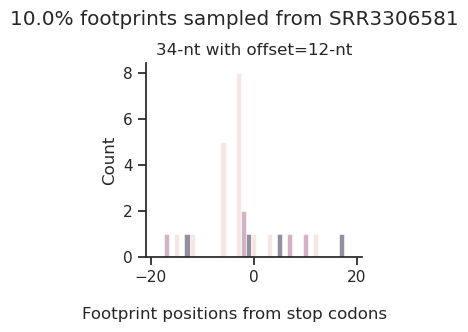

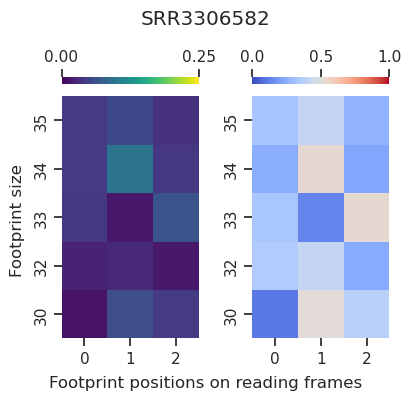

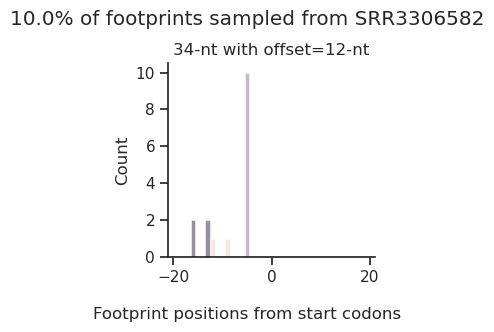

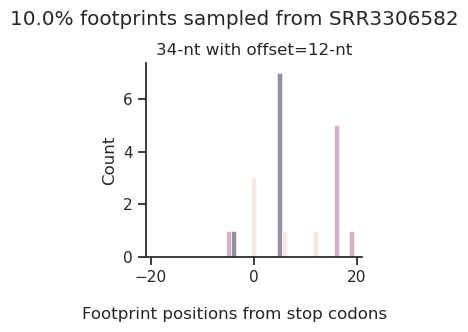

In [2]:
import numpy as np
import pandas as pd
import logging
import os
from glob import glob
from riboss.footprints import analyse_footprints


offset_method = '5p'
adj = 12
downsampling = 0.1
outdir = '../results/park_2016_datasets/analyse_footprints'
cds_range = '../ref/hg38/gencode.v47.annotation.cds_range.txt'


for i in glob('../doc/park_2016_datasets/*/*Aligned.out.bam')[2:]:
    try:
        _ = analyse_footprints(offset_method, adj, i, downsampling, cds_range, 'best', outdir)
    except Exception as e:
        logging.exception('Expected errors for RNA-seq library.')
        pass

#### Merge ribosome profiling and matched RNA-seq data and footprint offset files

In [3]:
! samtools merge \
    ../doc/park_2016_datasets/SRR3306588/SRR3306588Aligned.out.bam \
    ../doc/park_2016_datasets/SRR3306589/SRR3306589Aligned.out.bam \
    -f -o ../doc/park_2016_datasets/SRR3306588_9.bam

! samtools merge \
    ../doc/park_2016_datasets/SRR3306581/SRR3306581Aligned.out.bam \
    ../doc/park_2016_datasets/SRR3306582/SRR3306582Aligned.out.bam \
    -f -o ../doc/park_2016_datasets/SRR3306581_2.bam

! samtools sort ../doc/park_2016_datasets/SRR3306588_9.bam -o ../doc/park_2016_datasets/SRR3306588_9.sorted.bam
! samtools sort ../doc/park_2016_datasets/SRR3306581_2.bam -o ../doc/park_2016_datasets/SRR3306581_2.sorted.bam

! mv ../doc/park_2016_datasets/SRR3306588_9.sorted.bam ../doc/park_2016_datasets/SRR3306588_9.bam
! mv ../doc/park_2016_datasets/SRR3306581_2.sorted.bam ../doc/park_2016_datasets/SRR3306581_2.bam


! paste \
    <(zcat ../doc/park_2016_datasets/SRR3306581/SRR3306581.fastq.gz) \
    <(zcat ../doc/park_2016_datasets/SRR3306582/SRR3306582.fastq.gz) \
    | pigz > ../doc/park_2016_datasets/SRR3306581_2.fastq.gz


! cat \
    ../results/park_2016_datasets/analyse_footprints/SRR3306588Aligned.out.offset.txt \
    ../results/park_2016_datasets/analyse_footprints/SRR3306589Aligned.out.offset.txt \
    | sort -u > ../results/park_2016_datasets/analyse_footprints/SRR3306588_9Aligned.out.offset.txt

#### Build salmon index using transcriptome assembly and run salmon quant

In [1]:
from riboss.wrapper import quantify_transcripts

index = '../ref/hg38/gencode.v47.pc_transcripts_puff'
tx = '../ref/hg38/gencode.v47.pc_transcripts.fa'
rnaseq = '../doc/park_2016_datasets/SRR3306581_2.fastq.gz'
outdir = '../doc/park_2016_datasets/'
clip_3p_adapter_seq = 'TGGAATTCTCGGGTGCC'

quantify_transcripts(rnaseq, tx, adapter=clip_3p_adapter_seq, index=index, outdir=outdir)

Read1 before filtering:
total reads: 57060872
total bases: 5877269816
Q20 bases: 5727101080(97.4449%)
Q30 bases: 5562160731(94.6385%)

Read1 after filtering:
total reads: 56878349
total bases: 5845428775
Q20 bases: 5699665366(97.5064%)
Q30 bases: 5535706500(94.7015%)

Filtering result:
reads passed filter: 56878349
reads failed due to low quality: 43168
reads failed due to too many N: 105484
reads failed due to too short: 33871
reads with adapter trimmed: 439291
bases trimmed due to adapters: 16188432

Duplication rate (may be overestimated since this is SE data): 0.757423%

JSON report: fastp.json
HTML report: fastp.html

fastp -i ../doc/park_2016_datasets/SRR3306581_2.fastq.gz -o ../doc/park_2016_datasets/SRR3306581_2_trimmed.fastq.gz -q 10 -w 8 -a TGGAATTCTCGGGTGCC 
fastp v0.24.0, time used: 223 seconds
Version Info: This is the most recent version of salmon.
-----------------------------------------
| Loading contig table | Time = 103.95 ms
-----------------------------------------

#### Assign footprints to transcripts using riboprof (ribomap)

In [2]:
from riboss.wrapper import riboprofiler

offset = '../results/park_2016_datasets/analyse_footprints/SRR3306588_9Aligned.out.offset.txt'
mrnabam = '../doc/park_2016_datasets/SRR3306581_2.bam'
ribobam = '../doc/park_2016_datasets/SRR3306588_9.bam'
tx = '../ref/hg38/gencode.v47.pc_transcripts.fa'
sf = '../doc/park_2016_datasets/SRR3306581_2_salmon_quant/quant.sf'
out = '../results/park_2016_datasets/riboprofiler/SRR3306588_9'
cds_range_file = '../ref/hg38/gencode.v47.annotation.cds_range.txt'

riboprof_base = riboprofiler(offset, ribobam, mrnabam, 
                             tx, cds_range_file, 
                             sf, out)

getting transcript info...
total number of transcripts in transcriptome: 112218
assigning ribo-seq reads...
constructing profile class...
number of transcripts in profile class: 8651
loading reads from bam...
getting readlen mapping to P site offset...
getting alignment records...
total number of reads: 105598755
getting read type and p-sites...
total output footprint: 105598755
total: 105598755	multi_mapped: 14710709 (13.93 %)
assigning reads to frame 0 loci...
reads used: 32128727 reads assigned: 32128727
assigning reads to frame 1 and 2 loci...
reads used: 38498456 reads assigned: 38498456
assigning reads to UTR loci...
reads used: 41881334 reads assigned: 41881334
assigning RNA-seq reads...
number of transcripts in profile class: 8651
loading reads from bam...
getting alignment records...
total number of reads: 100027580
getting read type and p-sites...
total output footprint: 100027580
total: 100027580	multi_mapped: 29184008 (29.18 %)
assigning reads...
reads used: 100027580 reads

INFO:root:saved main output as ../results/park_2016_datasets/riboprofiler/SRR3306588_9.base


#### Find new ORFs using the main RIBOSS function

##### Use RNA-seq as negatives

parsing ribomap output : 100%|████████████████████████████████| 8.62k/8.62k [00:02<00:00, 3.35kit/s]
parsing ribomap output : 100%|████████████████████████████████| 8.62k/8.62k [00:02<00:00, 3.65kit/s]
INFO:root:saved ribosome profiles as ../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboprof.plus.bg and ../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboprof.minus.bg
counting footprints    : 100%|███████████████████████████████████| 167k/167k [00:01<00:00, 133kit/s]
comparing periodicity  : 100%|████████████████████████████████████| 233/233 [00:09<00:00, 24.33it/s]
INFO:root:saved RIBOSS stats as ../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboss.boss.pkl and ../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboss.boss.csv
INFO:root:saved significant RIBOSS results (n=213) as ../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboss.sig.pkl
--2025-02-15 15:12:17--  https://genome.ucsc.edu/goldenpath/help/examples/bigGenePred.as
Resolving

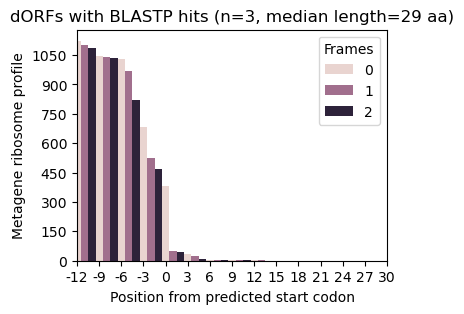

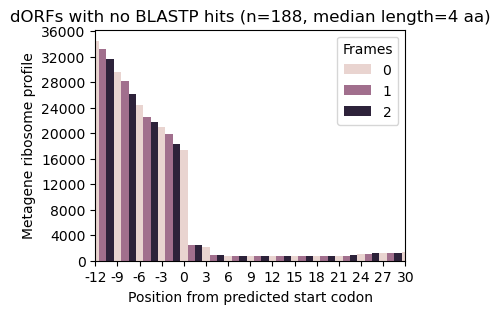

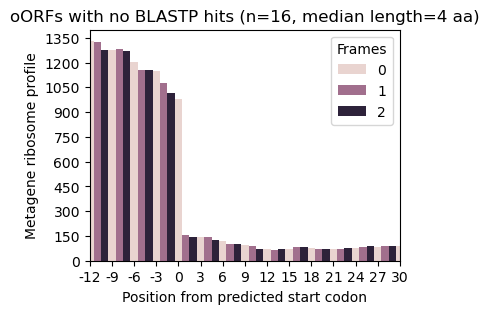

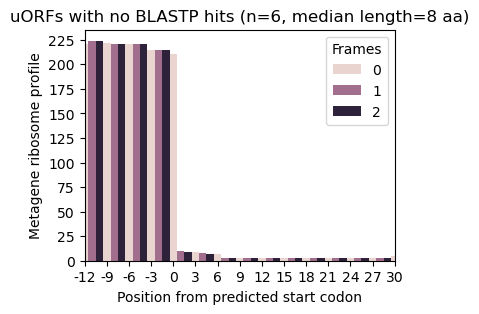

In [1]:
import pandas as pd
from riboss.riboss import riboss


superkingdom = 'Eukaryota'
tx = '../ref/hg38/gencode.v47.pc_transcripts.fa'
fasta = '../ref/hg38/hg38.fa'
riboprof_base = '../results/park_2016_datasets/riboprofiler/SRR3306588_9.base'
profile='rna'
genepred = '../ref/hg38/gencode.v47.annotation.gp'
outdir = '../results/park_2016_datasets/riboss_rnaseq'
padj_method = 'fdr_bh'
tie = True #False
num_simulations = 1000
email='chunshen.lim@otago.ac.nz'
api_key='55890b8dfafe4d49e57c5f1d031aec4c2509'
df = pd.read_pickle('../ref/hg38/gencode.v47.annotation.orf_finder.pkl.gz')

boss_df, sig, blast, tophits, ipg = riboss(superkingdom, df, riboprof_base, profile, fasta, tx, genepred,
                                           padj_method=padj_method, tie=tie, num_simulations=num_simulations, 
                                           run_blastp=True, run_efetch=True, verbose=True,
                                           email=email, api_key=api_key, outdir=outdir)

In [2]:
boss_df.shape, sig.shape, blast.shape, tophits.shape

((46920, 14), (213, 20), (254, 15), (213, 26))

In [3]:
boss_df.value_counts('boss')

boss
default              26329
lacks periodicity    20358
dORF                   192
tie                     19
oORF                    16
uORF                     6
Name: count, dtype: int64

##### Use ribosome-profiling as positives

parsing ribomap output : 100%|████████████████████████████████| 8.62k/8.62k [00:02<00:00, 3.34kit/s]
parsing ribomap output : 100%|████████████████████████████████| 8.62k/8.62k [00:02<00:00, 3.66kit/s]
INFO:root:saved ribosome profiles as ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.plus.bg and ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.minus.bg
counting footprints    : 100%|███████████████████████████████████| 167k/167k [00:01<00:00, 135kit/s]
comparing periodicity  : 100%|██████████████████████████████████| 2577/2577 [01:48<00:00, 23.76it/s]
INFO:root:saved RIBOSS stats as ../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss.pkl and ../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss.csv
INFO:root:saved significant RIBOSS results (n=553) as ../results/park_2016_datasets/riboss/SRR3306588_9.riboss.sig.pkl
--2025-02-15 15:34:41--  https://genome.ucsc.edu/goldenpath/help/examples/bigGenePred.as
Resolving genome.ucsc.edu (genome.ucsc.edu).

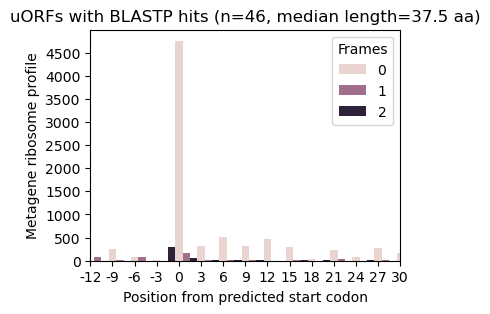

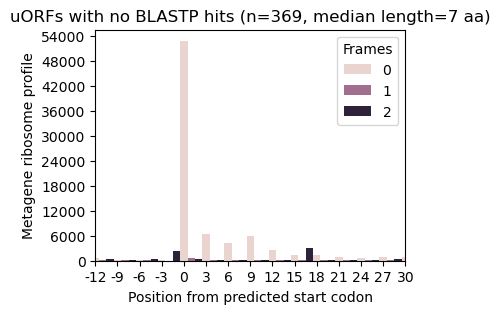

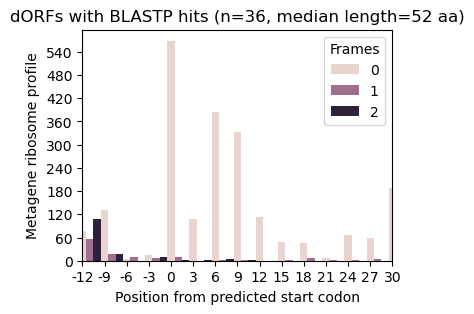

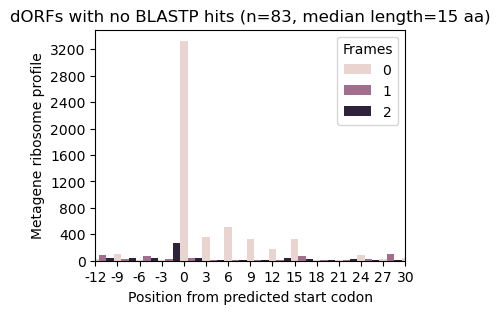

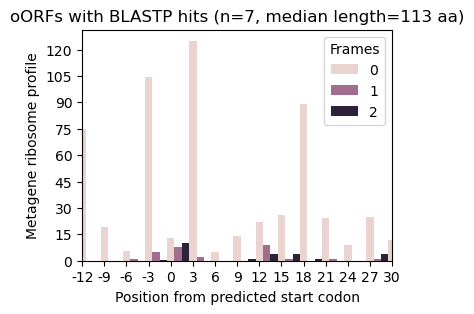

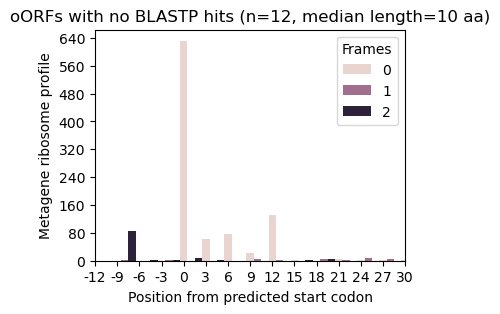

In [1]:
import pandas as pd
from riboss.riboss import riboss


superkingdom = 'Eukaryota'
tx = '../ref/hg38/gencode.v47.pc_transcripts.fa'
fasta = '../ref/hg38/hg38.fa'
riboprof_base = '../results/park_2016_datasets/riboprofiler/SRR3306588_9.base'
profile='ribo'
genepred = '../ref/hg38/gencode.v47.annotation.gp'
outdir = '../results/park_2016_datasets/riboss'
padj_method = 'fdr_bh'
tie = True #False
num_simulations = 1000
email='chunshen.lim@otago.ac.nz'
api_key='55890b8dfafe4d49e57c5f1d031aec4c2509'
df = pd.read_pickle('../ref/hg38/gencode.v47.annotation.orf_finder.pkl.gz')

boss_df, sig, blast, tophits, ipg = riboss(superkingdom, df, riboprof_base, profile, fasta, tx, genepred,
                                           padj_method=padj_method, tie=tie, num_simulations=num_simulations, 
                                           run_blastp=True, run_efetch=True, 
                                           email=email, api_key=api_key, outdir=outdir)

In [2]:
boss_df.shape, sig.shape, blast.shape, tophits.shape, ipg.shape

((8297, 14), (553, 20), (1997, 15), (553, 26), (4027, 11))

In [3]:
boss_df.value_counts('boss')

boss
default              5719
tie                  1171
mORF                  755
uORF                  483
dORF                  144
oORF                   24
lacks periodicity       1
Name: count, dtype: int64

In [4]:
boss_df.value_counts(['boss','ORF_type_x'])

boss               ORF_type_x
tie                uORF          727
uORF               uORF          483
mORF               uORF          438
tie                dORF          382
default            dORF          264
mORF               dORF          242
dORF               dORF          144
default            uORF          129
mORF               oORF           75
tie                oORF           62
default            oORF           58
oORF               oORF           24
lacks periodicity  dORF            1
Name: count, dtype: int64

#### Validate the genePred file for uORFs

In [5]:
! bedtools getfasta -bed ../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.uORF.bed -fi ../ref/hg38/hg38.fa -split -name -s -tab \
| cut -f2 | cut -c-3 | sort | uniq -c

     55 atg
      1 Atg
      6 ATg
   1277 ATG


In [6]:
! bedtools getfasta -bed ../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.uORF.bed -fi ../ref/hg38/hg38.fa -split -name -s -tab \
| cut -f2 | rev | cut -c-3 | sort | uniq -c

     11 aat
      1 aAT
    266 AAT
     33 agt
      1 agT
      1 aGT
      1 Agt
    713 AGT
     18 gat
      1 gAT
    292 GAT
      1 GTA


In [7]:
tophits.dropna()[tophits.dropna().title.str.contains('NP_')]

,tid,start_codon_x,start_codon_y,ORF_range_x,ORF_type_x,start_rprofile_x,ORF_range_y,ORF_type_y,start_rprofile_y,tab,...,accession,title,length,bits,subject_sequence,subject_start,subject_end,query_sequence,query_start,query_end
476,ENST00000361377.8,ATG,ATG,"[334, 484]",oORF,"[0.0, 0.0, 0.0]","[42, 309]",mORF,"[0.0, 0.0, 0.0]","[[[38, 2, 4], [1113, 420, 78]], [[38, 6], [111...",...,NP_001125779,ref|NP_001125779.1| molybdopterin synthase cat...,84.0,100.523,MDEVEEKSKDVINFTAEKLSVDEVSQLVISPLCGAISLFVAWFQCQKQA,36.0,84.0,MDEVEEKSKDVINFTAEKLSVDEVSQLVISPLCGAISLFVAWFQCQKQA,1.0,49.0
808,ENST00000460668.5,ATG,ATG,"[515, 842]",dORF,"[0.0, 0.0, 0.0]","[259, 454]",mORF,"[22.0, 0.0, 0.0]","[[[362, 8, 8], [144, 133, 23]], [[362, 16], [1...",...,NP_001259024,ref|NP_001259024.1| syntaxin-4 isoform 1 [Homo...,219.0,221.476,MKQELQNLRDEIKQLGREIRLQLKAIEPQKEEADENYNSVNTRMRK...,1.0,109.0,MKQELQNLRDEIKQLGREIRLQLKAIEPQKEEADENYNSVNTRMRK...,1.0,109.0
943,ENST00000507232.5,ATG,ATG,"[528, 1947]",oORF,"[1.97756, 0.0, 0.0]","[163, 298]",mORF,"[48.2525, 0.395512, 1.58205]","[[[4296, 183, 341], [299, 23, 157]], [[4296, 5...",...,NP_001316568,ref|NP_001316568.1| protein Spindly isoform a ...,622.0,961.829,MSERVQESMSSEMLALQIELTEMESMKTTLKEEVNELQYRQEQLEL...,151.0,622.0,MSERVQESMSSEMLALQIELTEMESMKTTLKEEVNELQYRQEQLEL...,1.0,472.0
997,ENST00000508726.5,ATG,ATG,"[225, 531]",dORF,"[2.5487, 0.0, 0.0]","[7, 217]",mORF,"[0.0, 0.0, 0.0]","[[[491, 77, 29], [491, 70, 82]], [[491, 107], ...",...,NP_001310999,ref|NP_001310999.1| cyclin-dependent kinase 7 ...,289.0,215.312,MWAVGCILAELLLRVPFLPGDSDLDQLTRIFETLGTPTEEQWPDMC...,139.0,240.0,MWAVGCILAELLLRVPFLPGDSDLDQLTRIFETLGTPTEEQWPDMC...,1.0,102.0
1214,ENST00000535638.5,ATG,ATG,"[494, 785]",dORF,"[8.0, 6.0, 0.0]","[45, 630]",mORF,"[215.0, 8.0, 0.0]","[[[598, 17, 39], [1382, 56, 475]], [[598, 56],...",...,NP_057396,ref|NP_057396.1| WW domain-binding protein 11 ...,641.0,200.675,MDQDKHDDSTDDSDTDKSDGESDGDEFVHRDNGERDNNEEKKSGLS...,262.0,358.0,MDQDKHDDSTDDSDTDKSDGESDGDEFVHRDNGERDNNEEKKSGLS...,1.0,97.0
1473,ENST00000549114.5,ATG,ATG,"[1434, 1788]",oORF,"[0.0, 8.0, 7.0]","[303, 912]",mORF,"[0.0, 0.0, 0.0]","[[[210, 32, 26], [309, 128, 21]], [[210, 58], ...",...,NP_001310565,ref|NP_001310565.1| hydroxyacylglutathione hyd...,337.0,238.424,MQGAGALRTGGRAAAATGAGPPCAAVGAPECSPTRLSHPDPHRAGA...,221.0,337.0,MQGAGALRTGGRAAAATGAGPPCAAVGAPECSPTRLSHPDPHRAGA...,1.0,117.0
1728,ENST00000651235.1,ATG,ATG,"[3135, 3924]",dORF,"[0.0, 0.0, 0.0]","[46, 514]",mORF,"[35.0, 0.0, 0.0]","[[[577, 5, 21], [79, 24, 45]], [[577, 26], [79...",...,NP_001013858,ref|NP_001013858.1| mitotic spindle assembly c...,718.0,499.204,MQMELSHKRARVELERAASTSARNYEREVDRNQELLTRIRQLQERE...,72.0,332.0,MQMELSHKRARVELERAASTSARNYEREVDRNQELLTRIRQLQERE...,1.0,261.0
1792,ENST00000674652.1,ATG,ATG,"[778, 2005]",dORF,"[144.0, 0.0, 1.0]","[47, 875]",mORF,"[167.0, 0.0, 12.0]","[[[2509, 91, 153], [1770, 81, 479]], [[2509, 2...",...,NP_001596,"ref|NP_001596.2| alanine--tRNA ligase, cytopla...",968.0,766.533,MAYRVLADHARTITVALADGGRPDNTGRGYVLRRILRRAVRYAHEK...,293.0,672.0,MAYRVLADHARTITVALADGGRPDNTGRGYVLRRILRRAVRYAHEK...,1.0,381.0
1948,ENST00000703953.1,ATG,ATG,"[846, 2148]",dORF,"[0.0, 0.0, 0.0]","[62, 821]",mORF,"[111.829, 1.81835, 1.36376]","[[[309, 12, 2], [759, 131, 67]], [[309, 14], [...",...,NP_001309293,ref|NP_001309293.1| hexokinase-1 isoform HKI-t...,921.0,877.085,MCINTEWGAFGDDGSLEDIRTEFDREIDRGSLNPGKQLFEKMVSGM...,259.0,684.0,MCINTEWGAFGDDGSLEDIRTEFDREIDRGSLNPGKQLFEKMVSGM...,1.0,426.0


#### Ribo-Seq ORFs found using RIBOSS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Ribo-Seq ORFs that have over 10 mapped footprints

In [2]:
! cat \
<(awk 'BEGIN{OFS="\t"} {print $1,$2,$3,"riboprof",$4,"+"}' ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.plus.bg) \
<(awk 'BEGIN{OFS="\t"} {print $1,$2,$3,"riboprof",$4,"-"}' ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.minus.bg) \
| bedtools intersect -a ../doc/riboseqorfs/riboseqorfs.uniq.bed -b - \
-s -split -wo | datamash -s -g1,2,3,4,5,6,7,8,9,10,11,12 sum 19 \
| cut -f4,13 > ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.riboseqorfs.txt

! wc -l ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.riboseqorfs.txt

250 ../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.riboseqorfs.txt


In [3]:
of_rs_counts = pd.read_csv('../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.riboseqorfs.txt', sep='\t', header=None)
of_rs_counts.columns = ['Ribo-Seq_ORF','counts']
of_rs_counts.shape, of_rs_counts[of_rs_counts['counts']>10].shape

((250, 2), (194, 2))

##### Get Ribo-Seq ORFs that overlap the non-canonical ORFs in the boss results

In [4]:
! cat \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.uORF.bed \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.oORF.bed \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.dORF.bed \
| bedtools intersect -a - -b ../doc/riboseqorfs/riboseqorfs.uniq.bed \
-s -split -wo | awk '($2==$14) && ($3==$15)' \
> ../results/park_2016_datasets/riboss/SRR3306588_9.boss.riboseqorfs.txt

! wc -l ../results/park_2016_datasets/riboss/SRR3306588_9.boss.riboseqorfs.txt

98 ../results/park_2016_datasets/riboss/SRR3306588_9.boss.riboseqorfs.txt


##### Get all Ribo-Seq ORFs detected by RIBOSS orf_finder

In [5]:
! awk 'BEGIN{OFS="\t"} NR>1 {print $1,$8,$9,$2 "__" $5 "-" $6 "|" $NF,$7,$3}' ../results/park_2016_datasets/orf_finder/gencode.v47.annotation.orf_finder.txt \
| bedtools intersect -a - -b ../doc/riboseqorfs/riboseqorfs.uniq.bed -s -split -wo | awk '(($2==$8) || ($3==$9))' \
> ../doc/riboseqorfs/riboseqorfs.orf_finder.txt

! wc -l ../doc/riboseqorfs/riboseqorfs.orf_finder.txt

2808 ../doc/riboseqorfs/riboseqorfs.orf_finder.txt


2808 include double counts

In [6]:
boss_df = pd.read_pickle('../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss.pkl')
boss_df = boss_df[~boss_df.ORF_range_x.isna()].copy()
boss_df['oid'] = boss_df.tid + '__' + boss_df.ORF_range_x.str[0].astype(int).astype(str) + '-' + boss_df.ORF_range_x.str[1].astype(int).astype(str)

boss_df.shape

(3029, 15)

In [7]:
boss_df.value_counts('boss')

boss
tie                  1171
mORF                  755
uORF                  483
default               451
dORF                  144
oORF                   24
lacks periodicity       1
Name: count, dtype: int64

In [8]:
boss_rs = pd.read_csv('../results/park_2016_datasets/riboss/SRR3306588_9.boss.riboseqorfs.txt', sep='\t', header=None)
bo = pd.merge(boss_df,boss_rs.rename(columns={3:'oid',15:'Ribo-Seq_ORF'}))[['oid','Ribo-Seq_ORF','odds_ratio','boss']]
bo['padj'] = '>0.05'

sig = pd.read_pickle('../results/park_2016_datasets/riboss/SRR3306588_9.riboss.sig.pkl')
so = pd.merge(bo[['oid','Ribo-Seq_ORF']],sig)[['oid','Ribo-Seq_ORF','odds_ratio','boss']]
so['padj'] = '<0.05'

rs_of = pd.read_csv('../doc/riboseqorfs/riboseqorfs.orf_finder.txt', sep='\t', header=None)
rs_of['ORF_length'] = rs_of[16].apply(lambda x: np.sum([int(i) for i in x.split(',')[:-1]]))
rs_of = rs_of[rs_of[4]==rs_of.ORF_length].copy()
rs_of['oid'] = rs_of[3].str.split('|').str[0]
rs_of.rename(columns={9:'Ribo-Seq_ORF'}, inplace=True)
rs_of.shape

(2291, 21)

In [9]:
mo = pd.merge(rs_of[['oid','Ribo-Seq_ORF']], boss_df)[['oid','Ribo-Seq_ORF','odds_ratio','boss']].sort_values('odds_ratio')
mo['check'] = 'check'
mo['padj'] = '>0.05'

boss = pd.concat([so,bo,mo]).drop_duplicates('Ribo-Seq_ORF')

inf = boss[boss.odds_ratio==np.inf].copy()
inf['odds_ratio'] = 100

boss = pd.concat([boss[boss.odds_ratio!=np.inf],inf]).reset_index(drop=True)
boss.reset_index(drop=True, inplace=True)

boss.value_counts(['boss','padj'])

boss     padj 
mORF     >0.05    59
tie      >0.05    50
uORF     <0.05    27
default  >0.05    10
uORF     >0.05     6
dORF     <0.05     4
         >0.05     1
Name: count, dtype: int64

In [10]:
! cat \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.uORF.bed \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.oORF.bed \
../results/park_2016_datasets/riboss/SRR3306588_9.riboss.boss_tie.dORF.bed \
| bedtools intersect -a - -b ../doc/riboseqorfs/riboseqorfs.uniq.bed -s -split -wo \
| grep ENST00000512828

chr4	105708813	105709020	ENST00000512828.1__36-243	0	+	105708813	105709020	0	1	207,	0,	chr4	105708813	105717596	c4riboseqorf74	0	+	105708813	105717596	0	2	203,4,	0,8779,	203


In [11]:
! echo -e "chr4\t105708813\t105709020" | bedtools getfasta -bed - -fi ../ref/hg38/hg38.fa -tab

chr4:105708813-105709020	ATGAATGACGGCCGGCGCGAGTATTTTCCACATAAGGTGGCTGTCGTTTTTCTCCTGGCGTCTGTGGAGGCGAGTGGTCTGCGGGCAGCAGCTCCCAGAGGCAGCCTTGGAATTCCAGCTCGGACTGGGCGGGAAGGCGCAGGCGGCCCAGGTCGCCGACACGCTCACGCACCCTCCCTGCCTGGCCGCGCCTCTGCGACCAGGTAA


In [12]:
ENST00000512828='ATGAATGACGGCCGGCGCGAGTATTTTCCACATAAGGTGGCTGTCGTTTTTCTCCTGGCGTCTGTGGAGGCGAGTGGTCTGCGGGCAGCAGCTCCCAGAGGCAGCCTTGGAATTCCAGCTCGGACTGGGCGGGAAGGCGCAGGCGGCCCAGGTCGCCGACACGCTCACGCACCCTCCCTGCCTGGCCGCGCCTCTGCGACCAGGTAA'

from riboss.riboss import translate
len(translate(ENST00000512828))*3, len(ENST00000512828)

(204, 207)

c4riboseqorf74 has a stop codon and should be shorter

In [13]:
boss = boss[(boss.boss!='default')].copy()
# de['padj'] = '<0.05'

# boss = pd.concat([de,boss]).drop_duplicates('Ribo-Seq_ORF')
boss.value_counts(['boss','padj'])

boss  padj 
mORF  >0.05    59
tie   >0.05    50
uORF  <0.05    27
      >0.05     6
dORF  <0.05     4
      >0.05     1
Name: count, dtype: int64

In [14]:
boss.shape

(147, 6)

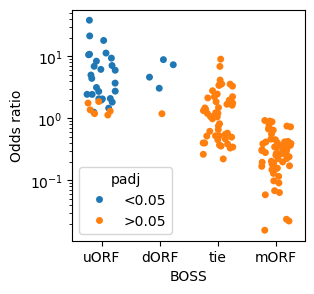

In [15]:
fig, ax = plt.subplots(figsize=(3,3))
sns.stripplot(data=boss, x='boss', y='odds_ratio', hue='padj', jitter=0.26, log_scale=True, ax=ax)
plt.xlabel('BOSS')
plt.ylabel('Odds ratio')
plt.savefig('../results/park_2016_datasets/riboss/SRR3306588_9.boss.riboseqorfs.pdf', bbox_inches ='tight')

#### Performance assessment

In [15]:
rsi = pd.read_csv('../doc/riboseqorfs/riboseqorfs.intersection.txt')
brs = pd.merge(rsi, boss[boss.boss!='mORF'], how='outer')[['Ribo-Seq_ORF','oid']]
brs['y_true'] = 1

brs_fn = brs[brs.oid.isna()].copy()
brs_fn['y_pred'] = -1
brs_tp = brs[~brs.oid.isna()].copy()
brs_tp['y_pred'] = 1

brs = pd.concat([brs_tp, brs_fn])
brs.drop('oid', axis=1, inplace=True)
brs.columns = ['id','y_true','y_pred']

rs_counts = pd.read_csv('../results/park_2016_datasets/riboss/SRR3306588_9.riboprof.riboseqorfs.txt', header=None, sep='\t')
rs_counts.columns = ['id','counts']
rs_counts = rs_counts[rs_counts['counts']>10].copy()
brs = pd.merge(brs, rs_counts[['id']])

brs.shape

(173, 3)

In [16]:
boss_rna = pd.read_pickle('../results/park_2016_datasets/riboss_rnaseq/SRR3306588_9.riboss.boss.pkl')
boss_rna.value_counts('boss')

boss
default              26329
lacks periodicity    20358
dORF                   192
tie                     19
oORF                    16
uORF                     6
Name: count, dtype: int64

In [17]:
# exclude default as no comparisons can be made
boss_rna = boss_rna[(boss_rna.boss!='default')].copy()

b_fp = boss_rna[(boss_rna.boss!='lacks periodicity')].copy()
b_fp['y_pred'] = 1
b_tn = boss_rna[(boss_rna.boss=='lacks periodicity')].copy()
b_tn['y_pred'] = -1

brna = pd.concat([b_fp,b_tn])
brna = brna[~brna.ORF_range_x.isna()].copy()
brna['oid'] = brna.tid + '__' + brna.ORF_range_x.str[0].astype(int).astype(str) + '-' + brna.ORF_range_x.str[1].astype(int).astype(str)

of_rt_id = pd.read_csv('../ref/hg38/orf_finder_ribotricer.intersection.txt', sep='\t')
brna = pd.merge(of_rt_id,brna[['oid','y_pred']])
brna['y_true'] = -1
brna.drop('oid', axis=1, inplace=True)
brna.columns = ['id','y_pred','y_true']

brna.value_counts('y_pred')

y_pred
-1    6833
 1      16
Name: count, dtype: int64

In [18]:
bperf = pd.concat([brna,brs])
bperf.to_pickle('../results/park_2016_datasets/riboss/boss_perf.pkl.gz')
bperf.value_counts(['y_true','y_pred'])

y_true  y_pred
-1      -1        6833
 1      -1         124
         1          49
-1       1          16
Name: count, dtype: int64

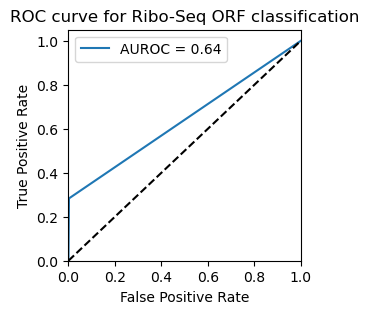

In [20]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, matthews_corrcoef, f1_score


fpr, tpr, thresholds = roc_curve(bperf.y_true, bperf.y_pred) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(3,3))  
plt.plot(fpr, tpr, label='AUROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Ribo-Seq ORF classification')
plt.legend()

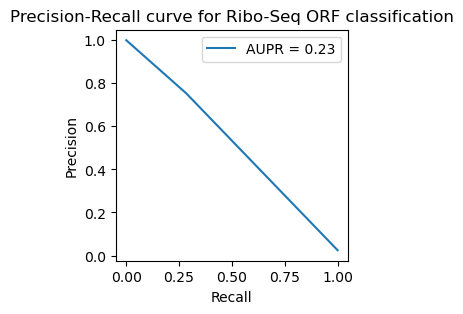

In [21]:
precision, recall, thresholds = precision_recall_curve(bperf.y_true, bperf.y_pred)
average_precision = average_precision_score(bperf.y_true, bperf.y_pred)

plt.figure(figsize=(3,3))
plt.plot(recall, precision, label='AUPR = %0.2f' % average_precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve for Ribo-Seq ORF classification")
plt.legend()

In [22]:
matthews_corrcoef(bperf.y_true, bperf.y_pred)

0.45469697491862376

In [23]:
f1_score(bperf.y_true, bperf.y_pred)

0.4117647058823529